# Aula7: Pandas & Matplotlib (Cont...)


In [ ]:
import pandas as pd
import pickle
import os
import seaborn as sns
import random

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
os.chdir("/Users/gustavorsampaio/Documents/Cursos/Python 2023.2/aula6/")

In [3]:
countries = pd.read_pickle("countries.pkl")
leagues = pd.read_pickle("leagues.pkl")
matches = pd.read_pickle("matches.pkl")
teams = pd.read_pickle("teams.pkl")
player = pd.read_pickle("player.pkl")
player_attributes = pd.read_pickle("player_attributes.pkl")
sequence = pd.read_pickle("sequence.pkl")
team_attributes = pd.read_pickle("team_attributes.pkl")
lat_long = pd.read_pickle("lat_long.pkl")

Realizar todas as construções que fizemos na aula passada

In [4]:
countries_leagues = countries.merge(leagues,left_on="id",right_on="id",how="outer", indicator=True)
countries_leagues = countries_leagues.drop("id",axis = 1)
countries_leagues = countries_leagues.rename(columns={'name_x':"country", 'name_y':"league"})
matches_new = matches[['id', 'country_id', 'league_id', 'season', 'stage', 'date',
                       'match_api_id', 'home_team_api_id', 'away_team_api_id',
                       'home_team_goal', 'away_team_goal']]
matches_new = matches_new.drop("id",axis=1)
data = matches_new.merge(countries_leagues,left_on="country_id",right_on="country_id",how="outer")
country_info  = countries_leagues.merge(lat_long,left_on="country",right_on="name",how="left")
country_info  = country_info.drop(["country_id","country_y","name"],axis = 1)

data["date"] = pd.to_datetime(data["date"],format="%Y-%m-%d")
data["year"] = pd.DatetimeIndex(data["date"]).year

data = data.merge(teams,left_on="home_team_api_id",right_on="team_api_id",how="left") # use only keys from left frame
data = data.drop(["id","team_api_id",'team_fifa_api_id'],axis = 1)
data = data.rename(columns={ 'team_long_name':"home_team_lname",'team_short_name':"home_team_sname"})
data.columns

data = data.merge(teams,left_on="away_team_api_id",right_on="team_api_id",how="left")
data = data.drop(["id","team_api_id",'team_fifa_api_id'],axis = 1)
data = data.rename(columns={ 'team_long_name':"away_team_lname",'team_short_name':"away_team_sname"})
data.columns

h_t = data.groupby("home_team_lname")["home_team_goal"].sum().reset_index()
a_t = data.groupby("away_team_lname")["away_team_goal"].sum().reset_index()
h_t = h_t.sort_values(by="home_team_goal",ascending= False)
a_t = a_t.sort_values(by="away_team_goal",ascending= False)

x = h_t
x = x.rename(columns={'home_team_lname':"team", 'home_team_goal':"goals"})
y = a_t
y = y.rename(columns={'away_team_lname':"team", 'away_team_goal':"goals"})

goals = pd.concat([x,y])
goals = goals.groupby("team")["goals"].sum().reset_index().sort_values(by = "goals",ascending = False)

### Times com mais gols

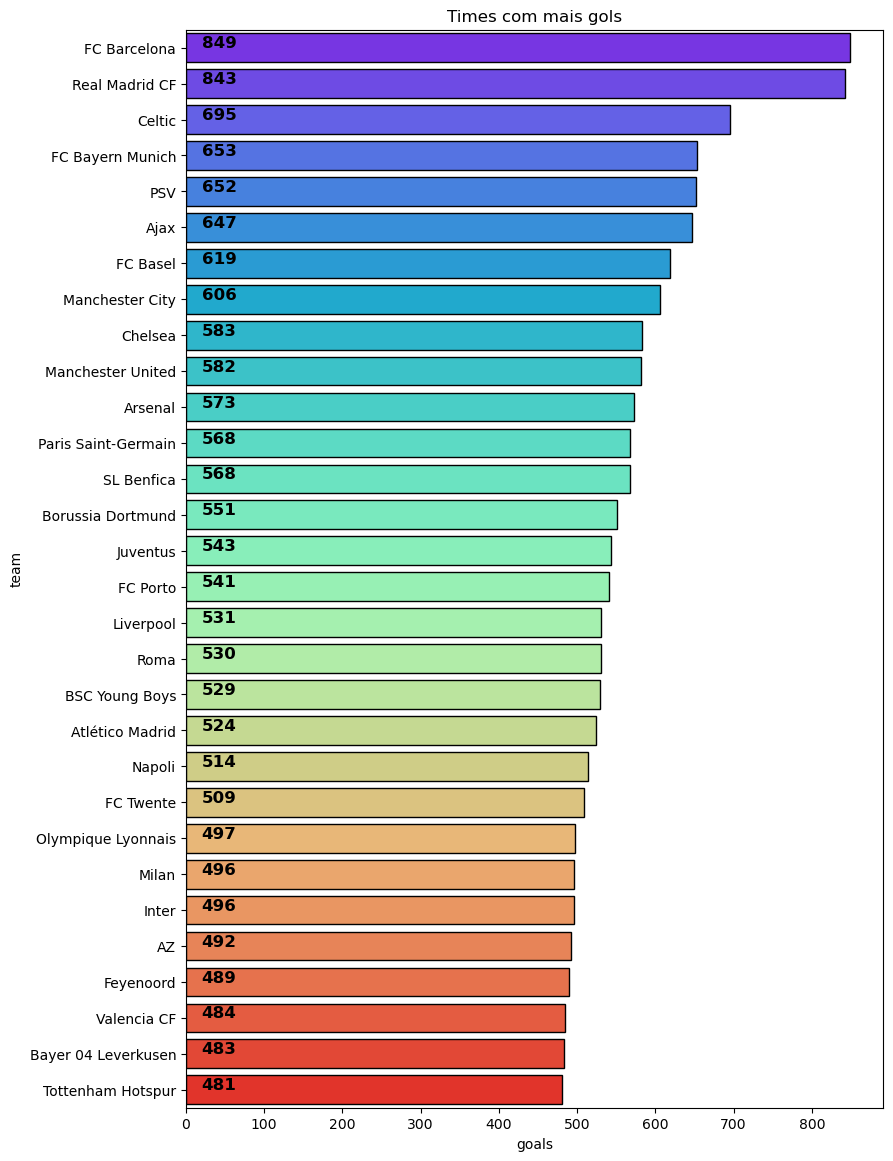

In [5]:
plt.figure(figsize=(9,14))
ax = sns.barplot(x="goals",y="team",
                 data=goals[:30],palette="rainbow",
                linewidth = 1,edgecolor = ['k' for i in range(0,30)])

for i,j in enumerate(goals["goals"][:30]):
    ax.text(20,i,j,weight="bold",color = "k",fontsize =12)

plt.title("Times com mais gols")
plt.show()

In [6]:
data.head()

,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,country,league,_merge,year,home_team_lname,home_team_sname,away_team_lname,away_team_sname
0,1,1,2008/2009,1,2008-08-17,492473,9987,9993,1,1,Belgium,Belgium Jupiler League,both,2008,KRC Genk,GEN,Beerschot AC,BAC
1,1,1,2008/2009,1,2008-08-16,492474,10000,9994,0,0,Belgium,Belgium Jupiler League,both,2008,SV Zulte-Waregem,ZUL,Sporting Lokeren,LOK
2,1,1,2008/2009,1,2008-08-16,492475,9984,8635,0,3,Belgium,Belgium Jupiler League,both,2008,KSV Cercle Brugge,CEB,RSC Anderlecht,AND
3,1,1,2008/2009,1,2008-08-17,492476,9991,9998,5,0,Belgium,Belgium Jupiler League,both,2008,KAA Gent,GEN,RAEC Mons,MON
4,1,1,2008/2009,1,2008-08-16,492477,7947,9985,1,3,Belgium,Belgium Jupiler League,both,2008,FCV Dender EH,DEN,Standard de Liège,STL


### Jogos por times

In [7]:
data.groupby("home_team_lname")["match_api_id"].count().reset_index()

,home_team_lname,match_api_id
0,1. FC Kaiserslautern,34
1,1. FC Köln,102
2,1. FC Nürnberg,85
3,1. FSV Mainz 05,119
4,AC Ajaccio,57
...,...,...
291,Xerez Club Deportivo,19
292,Zagłębie Lubin,90
293,Zawisza Bydgoszcz,30
294,Évian Thonon Gaillard FC,76


In [8]:
data.groupby("away_team_lname")["match_api_id"].count().reset_index()

,away_team_lname,match_api_id
0,1. FC Kaiserslautern,34
1,1. FC Köln,102
2,1. FC Nürnberg,85
3,1. FSV Mainz 05,119
4,AC Ajaccio,57
...,...,...
291,Xerez Club Deportivo,19
292,Zagłębie Lubin,90
293,Zawisza Bydgoszcz,30
294,Évian Thonon Gaillard FC,76


In [9]:
x = data.groupby("home_team_lname")["match_api_id"].count().reset_index()
x = x.rename(columns={"home_team_lname":"team"})
y = data.groupby("away_team_lname")["match_api_id"].count().reset_index()
y = y.rename(columns={"away_team_lname":"team"})
xy = pd.concat([x,y],axis=0)

In [10]:
x.head()

,team,match_api_id
0,1. FC Kaiserslautern,34
1,1. FC Köln,102
2,1. FC Nürnberg,85
3,1. FSV Mainz 05,119
4,AC Ajaccio,57


In [11]:
y.head()

,team,match_api_id
0,1. FC Kaiserslautern,34
1,1. FC Köln,102
2,1. FC Nürnberg,85
3,1. FSV Mainz 05,119
4,AC Ajaccio,57


In [12]:
xy.head()

,team,match_api_id
0,1. FC Kaiserslautern,34
1,1. FC Köln,102
2,1. FC Nürnberg,85
3,1. FSV Mainz 05,119
4,AC Ajaccio,57


In [13]:
match_teams =  xy.groupby("team")["match_api_id"].sum().reset_index().sort_values(by="match_api_id",ascending =False)
match_teams = match_teams.rename(columns={"match_api_id":"matches_played"})
match_teams

,team,matches_played
51,Chelsea,304
22,Athletic Club de Bilbao,304
186,Paris Saint-Germain,304
256,Sunderland,304
180,Olympique de Marseille,304
...,...,...
259,Termalica Bruk-Bet Nieciecza,30
135,KAS Eupen,30
16,Amadora,30
194,Portimonense,30


### Network de jogos dos maiores goleadores

Selecionaremos os 50 maiores marcadores

In [14]:
data[["home_team_lname","away_team_lname"]]

,home_team_lname,away_team_lname
0,KRC Genk,Beerschot AC
1,SV Zulte-Waregem,Sporting Lokeren
2,KSV Cercle Brugge,RSC Anderlecht
3,KAA Gent,RAEC Mons
4,FCV Dender EH,Standard de Liège
...,...,...
25974,FC St. Gallen,FC Thun
25975,FC Vaduz,FC Luzern
25976,Grasshopper Club Zürich,FC Sion
25977,Lugano,FC Zürich


In [16]:
goals.head()

,team,goals
75,FC Barcelona,849
211,Real Madrid CF,843
49,Celtic,695
77,FC Bayern Munich,653
184,PSV,652


In [17]:
goals["team"][0:50]

75                FC Barcelona
211             Real Madrid CF
49                      Celtic
77            FC Bayern Munich
184                        PSV
15                        Ajax
76                    FC Basel
161            Manchester City
51                     Chelsea
162          Manchester United
19                     Arsenal
186        Paris Saint-Germain
232                 SL Benfica
34           Borussia Dortmund
133                   Juventus
89                    FC Porto
158                  Liverpool
219                       Roma
24              BSC Young Boys
23             Atlético Madrid
171                     Napoli
96                   FC Twente
179         Olympique Lyonnais
164                      Milan
130                      Inter
12                          AZ
104                  Feyenoord
273                Valencia CF
26         Bayer 04 Leverkusen
262          Tottenham Hotspur
240                 Sevilla FC
229              SC Heerenveen
100     

In [18]:
ts = list(goals["team"][:50])

In [19]:
print(ts)

['FC Barcelona', 'Real Madrid CF', 'Celtic', 'FC Bayern Munich', 'PSV', 'Ajax', 'FC Basel', 'Manchester City', 'Chelsea', 'Manchester United', 'Arsenal', 'Paris Saint-Germain', 'SL Benfica', 'Borussia Dortmund', 'Juventus', 'FC Porto', 'Liverpool', 'Roma', 'BSC Young Boys', 'Atlético Madrid', 'Napoli', 'FC Twente', 'Olympique Lyonnais', 'Milan', 'Inter', 'AZ', 'Feyenoord', 'Valencia CF', 'Bayer 04 Leverkusen', 'Tottenham Hotspur', 'Sevilla FC', 'SC Heerenveen', 'FC Zürich', 'VfL Wolfsburg', 'Olympique de Marseille', 'LOSC Lille', 'Fiorentina', 'Everton', 'Dundee United', 'Grasshopper Club Zürich', 'RSC Anderlecht', 'FC Schalke 04', 'Vitesse', 'SV Werder Bremen', 'FC Luzern', 'Club Brugge KV', 'Lazio', 'VfB Stuttgart', 'Athletic Club de Bilbao', 'Udinese']


In [20]:
v = data[["home_team_lname","away_team_lname"]]

In [21]:
v

,home_team_lname,away_team_lname
0,KRC Genk,Beerschot AC
1,SV Zulte-Waregem,Sporting Lokeren
2,KSV Cercle Brugge,RSC Anderlecht
3,KAA Gent,RAEC Mons
4,FCV Dender EH,Standard de Liège
...,...,...
25974,FC St. Gallen,FC Thun
25975,FC Vaduz,FC Luzern
25976,Grasshopper Club Zürich,FC Sion
25977,Lugano,FC Zürich


In [22]:
v["home_team_lname"]

0                       KRC Genk
1               SV Zulte-Waregem
2              KSV Cercle Brugge
3                       KAA Gent
4                  FCV Dender EH
                  ...           
25974              FC St. Gallen
25975                   FC Vaduz
25976    Grasshopper Club Zürich
25977                     Lugano
25978             BSC Young Boys
Name: home_team_lname, Length: 25979, dtype: object

In [5]:
!pip install networkx

  Obtaining dependency information for networkx from https://files.pythonhosted.org/packages/f6/eb/5585c96636bbb2755865c31d83a19dd220ef88e716df4659dacb86e009cc/networkx-3.2-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/1.6 MB ? eta -:--:--
   - -------------------------------------- 0.1/1.6 MB 1.9 MB/s eta 0:00:01
   ---- ----------------------------------- 0.2/1.6 MB 2.3 MB/s eta 0:00:01
   ------ --------------------------------- 0.3/1.6 MB 2.2 MB/s eta 0:00:01
   --------- ------------------------------ 0.4/1.6 MB 2.3 MB/s eta 0:00:01
   ------------- -------------------------- 0.5/1.6 MB 2.4 MB/s eta 0:00:01
   --------------- ------------------------ 0.6/1.6 MB 2.5 MB/s eta 0:00:01
   ------------------ --------------------- 0.8/1.6 MB 2.6 MB/s eta 0:00:01
   -------------------- ------------------- 0.8/1.6 MB 2.4 MB/s eta 0:00:01
   --------------------- ------------------ 0.9/1.6 MB 2.3 MB/s eta 0:00:01
   ----------------------- ---------------- 1.0/


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [23]:
v["home_team_lname"].isin(ts)

0        False
1        False
2        False
3        False
4        False
         ...  
25974    False
25975    False
25976     True
25977    False
25978     True
Name: home_team_lname, Length: 25979, dtype: bool

#### & = E, | = OU

In [24]:
(v["home_team_lname"].isin(ts)) | (v["away_team_lname"].isin(ts))

0        False
1        False
2         True
3        False
4        False
         ...  
25974    False
25975     True
25976     True
25977     True
25978     True
Length: 25979, dtype: bool

In [25]:
v[(v["home_team_lname"].isin(ts)) & (v["away_team_lname"].isin(ts))]

,home_team_lname,away_team_lname
27,Club Brugge KV,RSC Anderlecht
189,RSC Anderlecht,Club Brugge KV
313,Club Brugge KV,RSC Anderlecht
376,RSC Anderlecht,Club Brugge KV
556,RSC Anderlecht,Club Brugge KV
...,...,...
25963,FC Zürich,FC Luzern
25967,FC Basel,FC Zürich
25968,Grasshopper Club Zürich,BSC Young Boys
25971,FC Luzern,Grasshopper Club Zürich


In [37]:
v = v[(v["home_team_lname"].isin(ts)) & (v["away_team_lname"].isin(ts))]

In [38]:
v

,home_team_lname,away_team_lname
27,Club Brugge KV,RSC Anderlecht
189,RSC Anderlecht,Club Brugge KV
313,Club Brugge KV,RSC Anderlecht
376,RSC Anderlecht,Club Brugge KV
556,RSC Anderlecht,Club Brugge KV
...,...,...
25963,FC Zürich,FC Luzern
25967,FC Basel,FC Zürich
25968,Grasshopper Club Zürich,BSC Young Boys
25971,FC Luzern,Grasshopper Club Zürich


#### !pip install networkx

In [6]:
import networkx as nx


In [3]:
import warnings
warnings.filterwarnings("ignore")

[from_pandas_edgelist](https://networkx.github.io/documentation/latest/reference/generated/networkx.convert_matrix.from_pandas_edgelist.html): Return a graph from Pandas DataFrame containing an edge list

[draw_kamada_kawai](): Draw the graph G with a Kamada-Kawai force-directed layout : Force-directed graph drawing algorithms are a class of algorithms for drawing graphs in an aesthetically-pleasing way. Their purpose is to position the nodes of a graph in two-dimensional or three-dimensional space so that all the edges are of more or less equal length and there are as few crossing edges as possible, by assigning forces among the set of edges and the set of nodes, based on their relative positions, and then using these forces either to simulate the motion of the edges and nodes or to minimize their energy.

In [41]:
g = nx.from_pandas_edgelist(v,"home_team_lname","away_team_lname")

In [42]:
g

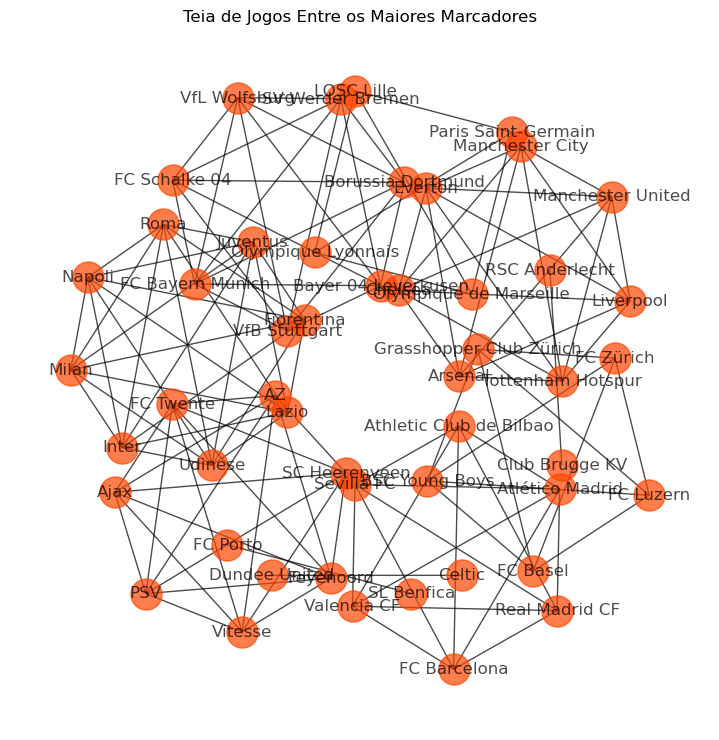

In [43]:
fig = plt.figure(figsize=(7,7))
nx.draw_kamada_kawai(g,with_labels =True,node_size =500,node_color ="Orangered",alpha=.7)
plt.title("Teia de Jogos Entre os Maiores Marcadores")
fig.set_facecolor("white")
plt.show()

### Distribuição de gols dentro e fora de casa

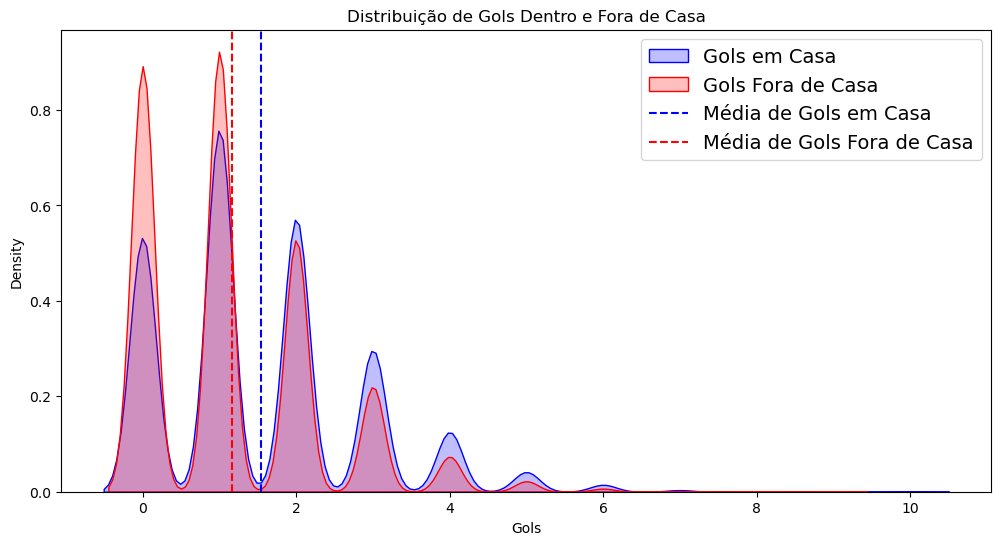

In [44]:
plt.figure(figsize=(12,6))

sns.kdeplot(data["home_team_goal"],shade=True,
            color="b",label="Gols em Casa")

sns.kdeplot(data["away_team_goal"],shade=True,
            color="r",label="Gols Fora de Casa")

plt.axvline(data["home_team_goal"].mean(),linestyle = "dashed", # Adicionar linha vertical.
            color="b",label="Média de Gols em Casa")

plt.axvline(data["away_team_goal"].mean(),linestyle = "dashed", # Adicionar linha vertical. 
            color="r",label="Média de Gols Fora de Casa")

plt.legend(loc="best",prop = {"size" : 14})
plt.title("Distribuição de Gols Dentro e Fora de Casa")
plt.xlabel("Gols")
plt.show()

In [45]:
data.groupby(["home_team_lname","league"]).agg({"match_api_id":"count","home_team_goal":"sum"}).reset_index()

,home_team_lname,league,match_api_id,home_team_goal
0,1. FC Kaiserslautern,Germany 1. Bundesliga,34,37
1,1. FC Köln,Germany 1. Bundesliga,102,116
2,1. FC Nürnberg,Germany 1. Bundesliga,85,108
3,1. FSV Mainz 05,Germany 1. Bundesliga,119,171
4,AC Ajaccio,France Ligue 1,57,64
...,...,...,...,...
291,Xerez Club Deportivo,Spain LIGA BBVA,19,20
292,Zagłębie Lubin,Poland Ekstraklasa,90,116
293,Zawisza Bydgoszcz,Poland Ekstraklasa,30,43
294,Évian Thonon Gaillard FC,France Ligue 1,76,105


### Jogos vs. Gols por times

In [46]:
x = data.groupby(["home_team_lname","league"]).agg({"match_api_id":"count","home_team_goal":"sum"}).reset_index()
y = data.groupby(["away_team_lname","league"]).agg({"match_api_id":"count","away_team_goal":"sum"}).reset_index()
x = x.rename(columns={'home_team_lname':"team", 'match_api_id':"matches", 'home_team_goal':"goals"})
y = y.rename(columns={'away_team_lname':"team", 'match_api_id':"matches", 'away_team_goal':"goals"})
xy = pd.concat([x,y])

In [47]:
xy

,team,league,matches,goals
0,1. FC Kaiserslautern,Germany 1. Bundesliga,34,37
1,1. FC Köln,Germany 1. Bundesliga,102,116
2,1. FC Nürnberg,Germany 1. Bundesliga,85,108
3,1. FSV Mainz 05,Germany 1. Bundesliga,119,171
4,AC Ajaccio,France Ligue 1,57,64
...,...,...,...,...
291,Xerez Club Deportivo,Spain LIGA BBVA,19,18
292,Zagłębie Lubin,Poland Ekstraklasa,90,91
293,Zawisza Bydgoszcz,Poland Ekstraklasa,30,32
294,Évian Thonon Gaillard FC,France Ligue 1,76,75


In [48]:
xy = xy.groupby(["team","league"])[["matches","goals"]].sum().reset_index()
xy = xy.sort_values(by="goals",ascending=False)

In [49]:
xy

,team,league,matches,goals
75,FC Barcelona,Spain LIGA BBVA,304,849
211,Real Madrid CF,Spain LIGA BBVA,304,843
49,Celtic,Scotland Premier League,304,695
77,FC Bayern Munich,Germany 1. Bundesliga,272,653
184,PSV,Netherlands Eredivisie,272,652
...,...,...,...,...
16,Amadora,Portugal Liga ZON Sagres,30,26
264,Trofense,Portugal Liga ZON Sagres,30,25
78,FC Dordrecht,Netherlands Eredivisie,34,24
56,Córdoba CF,Spain LIGA BBVA,38,22


In [50]:
xy[xy['team'] == '1. FC Kaiserslautern']

,team,league,matches,goals
0,1. FC Kaiserslautern,Germany 1. Bundesliga,68,72


In [51]:
xy.head()

,team,league,matches,goals
75,FC Barcelona,Spain LIGA BBVA,304,849
211,Real Madrid CF,Spain LIGA BBVA,304,843
49,Celtic,Scotland Premier League,304,695
77,FC Bayern Munich,Germany 1. Bundesliga,272,653
184,PSV,Netherlands Eredivisie,272,652


In [52]:
plt.figure(figsize=(13,6))
c   = ["r","g","b","m","y","yellow","c","orange","grey","lime","white"] # 11 cores para 11 ligas
lg = xy["league"].unique()

for i,j,k in zip(lg,range(len(lg)),c):
    print(i,j,k)

Spain LIGA BBVA 0 r
Scotland Premier League 1 g
Germany 1. Bundesliga 2 b
Netherlands Eredivisie 3 m
Switzerland Super League 4 y
England Premier League 5 yellow
France Ligue 1 6 c
Portugal Liga ZON Sagres 7 orange
Italy Serie A 8 grey
Belgium Jupiler League 9 lime
Poland Ekstraklasa 10 white


<Figure size 1300x600 with 0 Axes>

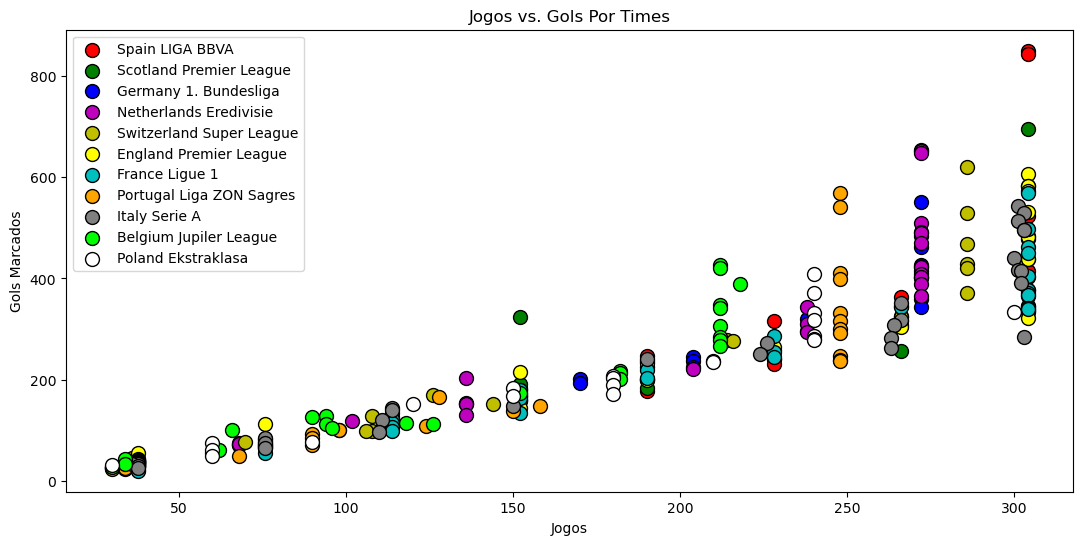

In [53]:
plt.figure(figsize=(13,6))
c   = ["r","g","b","m","y","yellow","c","orange","grey","lime","white"] # 11 cores para 11 ligas
lg = xy["league"].unique()


for i,j,k in zip(lg,range(len(lg)),c):
    plt.scatter("matches","goals",data=xy[xy["league"] == i],label=i,s=100,alpha=1,linewidths=1,edgecolors="k",color=k)
    plt.legend(loc="best")
    plt.xlabel("Jogos")
    plt.ylabel("Gols Marcados")

plt.title("Jogos vs. Gols Por Times")
plt.show()

### Temporadas vs. Gols

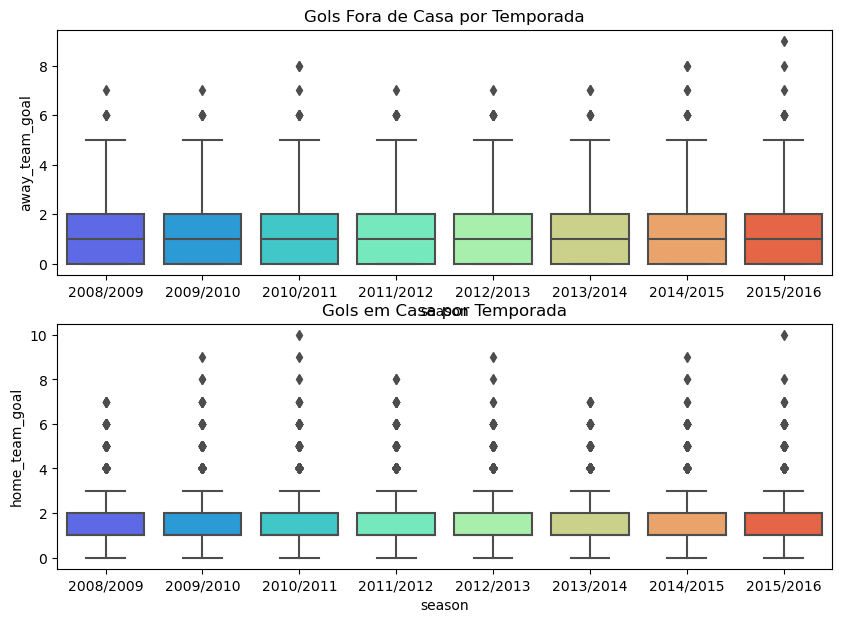

In [54]:
plt.figure(figsize=(10,7))

plt.subplot(211)
sns.boxplot(x = data["season"],y = data["away_team_goal"],palette="rainbow")
plt.title("Gols Fora de Casa por Temporada")

plt.subplot(212)
sns.boxplot(x = data["season"],y = data["home_team_goal"],palette="rainbow")
plt.title("Gols em Casa por Temporada")
plt.show()

In [55]:
data.head()

,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,country,league,_merge,year,home_team_lname,home_team_sname,away_team_lname,away_team_sname
0,1,1,2008/2009,1,2008-08-17,492473,9987,9993,1,1,Belgium,Belgium Jupiler League,both,2008,KRC Genk,GEN,Beerschot AC,BAC
1,1,1,2008/2009,1,2008-08-16,492474,10000,9994,0,0,Belgium,Belgium Jupiler League,both,2008,SV Zulte-Waregem,ZUL,Sporting Lokeren,LOK
2,1,1,2008/2009,1,2008-08-16,492475,9984,8635,0,3,Belgium,Belgium Jupiler League,both,2008,KSV Cercle Brugge,CEB,RSC Anderlecht,AND
3,1,1,2008/2009,1,2008-08-17,492476,9991,9998,5,0,Belgium,Belgium Jupiler League,both,2008,KAA Gent,GEN,RAEC Mons,MON
4,1,1,2008/2009,1,2008-08-16,492477,7947,9985,1,3,Belgium,Belgium Jupiler League,both,2008,FCV Dender EH,DEN,Standard de Liège,STL


### Sumário de Gols Marcados por Ano

In [56]:
data["total_goal"] = data["home_team_goal"]+data["away_team_goal"]

In [57]:
data.head()

,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,country,league,_merge,year,home_team_lname,home_team_sname,away_team_lname,away_team_sname,total_goal
0,1,1,2008/2009,1,2008-08-17,492473,9987,9993,1,1,Belgium,Belgium Jupiler League,both,2008,KRC Genk,GEN,Beerschot AC,BAC,2
1,1,1,2008/2009,1,2008-08-16,492474,10000,9994,0,0,Belgium,Belgium Jupiler League,both,2008,SV Zulte-Waregem,ZUL,Sporting Lokeren,LOK,0
2,1,1,2008/2009,1,2008-08-16,492475,9984,8635,0,3,Belgium,Belgium Jupiler League,both,2008,KSV Cercle Brugge,CEB,RSC Anderlecht,AND,3
3,1,1,2008/2009,1,2008-08-17,492476,9991,9998,5,0,Belgium,Belgium Jupiler League,both,2008,KAA Gent,GEN,RAEC Mons,MON,5
4,1,1,2008/2009,1,2008-08-16,492477,7947,9985,1,3,Belgium,Belgium Jupiler League,both,2008,FCV Dender EH,DEN,Standard de Liège,STL,4


In [58]:
a = data.groupby("season").agg({"total_goal":"sum"})
m = data.groupby("season").agg({"total_goal":"mean"})
s = data.groupby("season").agg({"total_goal":"std"})
x = data.groupby("season").agg({"total_goal":"max"})

In [59]:
a

,total_goal
season,
2008/2009,8672
2009/2010,8632
2010/2011,8749
2011/2012,8747
2012/2013,9039
2013/2014,8389
2014/2015,8897
2015/2016,9162


In [60]:
m

,total_goal
season,
2008/2009,2.607336
2009/2010,2.672446
2010/2011,2.683742
2011/2012,2.716460
2012/2013,2.772699
2013/2014,2.766821
2014/2015,2.675789
2015/2016,2.754660


In [61]:
s

,total_goal
season,
2008/2009,1.627506
2009/2010,1.689001
2010/2011,1.656340
2011/2012,1.708132
2012/2013,1.695849
2013/2014,1.663566
2014/2015,1.665147
2015/2016,1.668803


In [62]:
x

,total_goal
season,
2008/2009,9
2009/2010,12
2010/2011,10
2011/2012,10
2012/2013,11
2013/2014,10
2014/2015,10
2015/2016,12


In [63]:
data[data["total_goal"] == 12]

,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,country,league,_merge,year,home_team_lname,home_team_sname,away_team_lname,away_team_sname,total_goal
20106,19694,19694,2009/2010,37,2010-05-05,820504,9927,10251,6,6,Scotland,Scotland Premier League,both,2010,Motherwell,MOT,Hibernian,HIB,12
24247,21518,21518,2015/2016,16,2015-12-20,2030233,8633,8370,10,2,Spain,Spain LIGA BBVA,both,2015,Real Madrid CF,REA,Rayo Vallecano,RAY,12


In [64]:
xx = a.merge(m,left_index=True,right_index=True,how="left")

In [65]:
xx

,total_goal_x,total_goal_y
season,,
2008/2009,8672,2.607336
2009/2010,8632,2.672446
2010/2011,8749,2.683742
2011/2012,8747,2.716460
2012/2013,9039,2.772699
2013/2014,8389,2.766821
2014/2015,8897,2.675789
2015/2016,9162,2.754660


In [66]:
yy = s.merge(x,left_index=True,right_index=True,how="left")

In [67]:
yy

,total_goal_x,total_goal_y
season,,
2008/2009,1.627506,9
2009/2010,1.689001,12
2010/2011,1.656340,10
2011/2012,1.708132,10
2012/2013,1.695849,11
2013/2014,1.663566,10
2014/2015,1.665147,10
2015/2016,1.668803,12


In [68]:
xx.merge(yy,left_index=True,right_index=True,how="left").reset_index()

,season,total_goal_x_x,total_goal_y_x,total_goal_x_y,total_goal_y_y
0,2008/2009,8672,2.607336,1.627506,9
1,2009/2010,8632,2.672446,1.689001,12
2,2010/2011,8749,2.683742,1.656340,10
3,2011/2012,8747,2.716460,1.708132,10
4,2012/2013,9039,2.772699,1.695849,11
5,2013/2014,8389,2.766821,1.663566,10
6,2014/2015,8897,2.675789,1.665147,10
7,2015/2016,9162,2.754660,1.668803,12


In [69]:
x_y = xx.merge(yy,left_index=True,right_index=True,how="left").reset_index()

In [70]:
x_y = x_y.rename(columns={'total_goal_x_x':"goals", 'total_goal_y_x':"mean",
                          'total_goal_x_y':"std",'total_goal_y_y':"max"})

In [71]:
x_y

,season,goals,mean,std,max
0,2008/2009,8672,2.607336,1.627506,9
1,2009/2010,8632,2.672446,1.689001,12
2,2010/2011,8749,2.683742,1.656340,10
3,2011/2012,8747,2.716460,1.708132,10
4,2012/2013,9039,2.772699,1.695849,11
5,2013/2014,8389,2.766821,1.663566,10
6,2014/2015,8897,2.675789,1.665147,10
7,2015/2016,9162,2.754660,1.668803,12


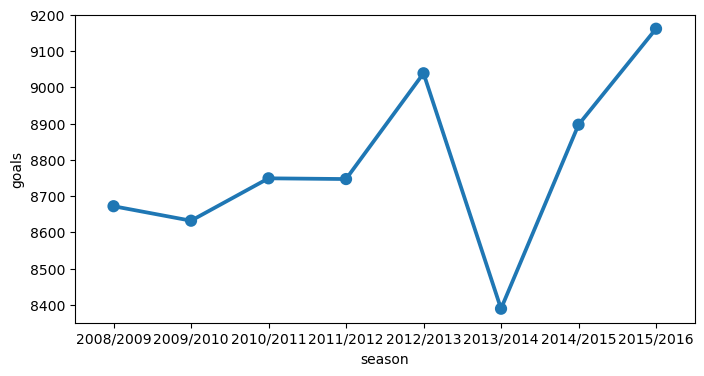

In [75]:
plt.figure(figsize=(8,4))
sns.pointplot(data=x_y, x="season", y="goals")
plt.show()

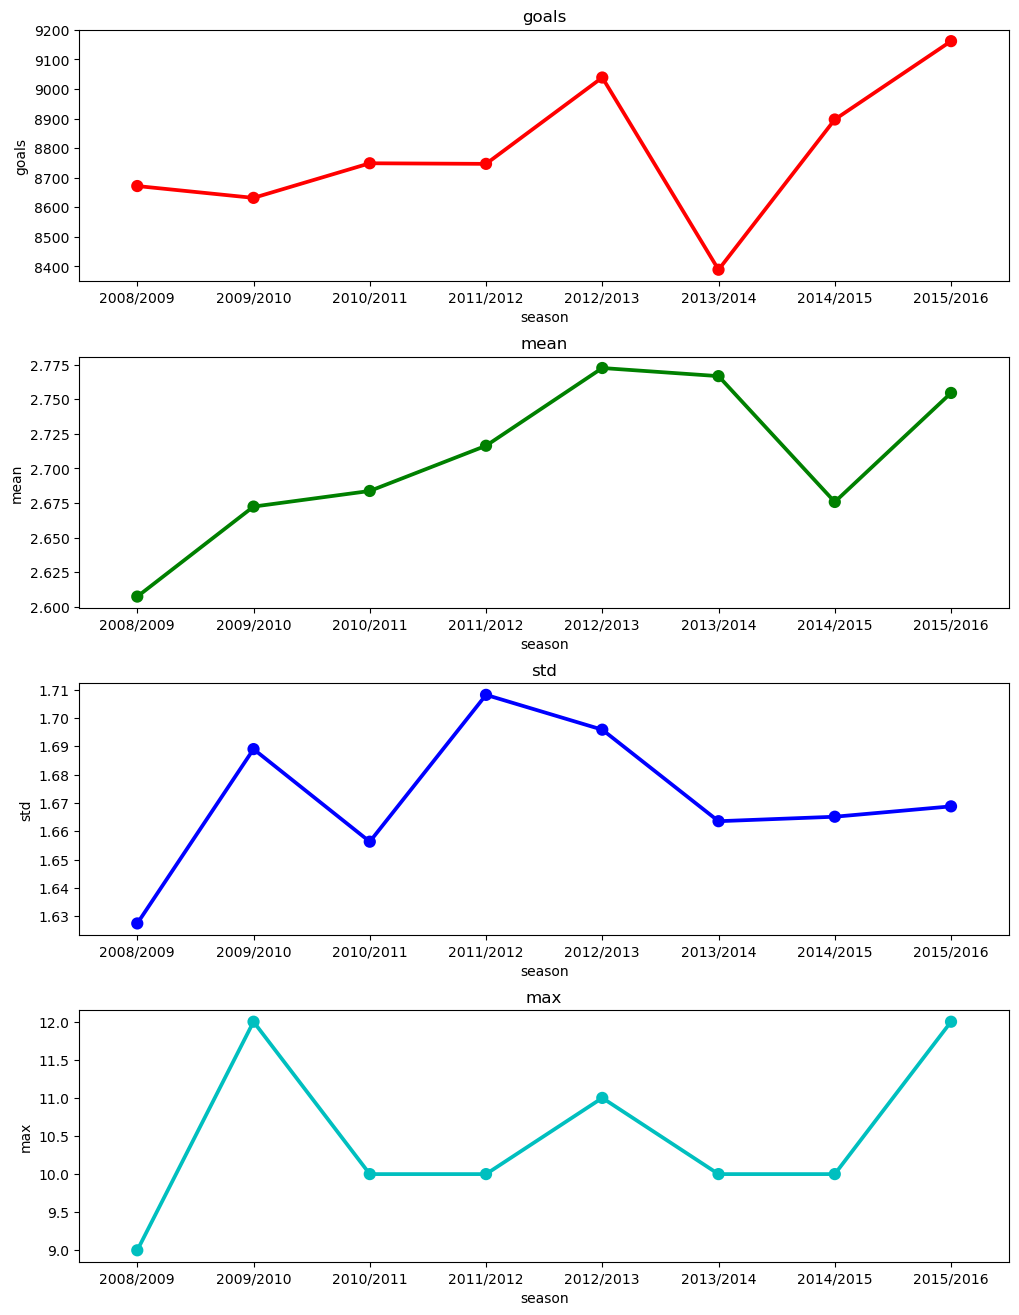

In [79]:
cols = [ 'goals', 'mean', 'std', 'max' ]
length = len(cols)
cs   = ["r","g","b","c"] 
plt.figure(figsize=(12,16))

for i,j,k in zip(cols,range(length),cs):
    #
    plt.subplot(length,int(length/length),j+1)
    #
    sns.pointplot(data=x_y, x="season", y=i, color=k)
    plt.title(i)
    plt.subplots_adjust(hspace =.3)

plt.show()

In [ ]:
plt.subplot(411)
plt.subplot(412)
plt.subplot(413)
plt.subplot(414)

In [80]:
cols = [ 'goals', 'mean', 'std', 'max' ]
length = len(cols)
cs   = ["r","g","b","c"] 

for i,j,k in zip(cols,range(length),cs):
    print(length,int(length/length),j+1)

4 1 1
4 1 2
4 1 3
4 1 4


### Interação entre os times

In [81]:
data.head()

,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,country,league,_merge,year,home_team_lname,home_team_sname,away_team_lname,away_team_sname,total_goal
0,1,1,2008/2009,1,2008-08-17,492473,9987,9993,1,1,Belgium,Belgium Jupiler League,both,2008,KRC Genk,GEN,Beerschot AC,BAC,2
1,1,1,2008/2009,1,2008-08-16,492474,10000,9994,0,0,Belgium,Belgium Jupiler League,both,2008,SV Zulte-Waregem,ZUL,Sporting Lokeren,LOK,0
2,1,1,2008/2009,1,2008-08-16,492475,9984,8635,0,3,Belgium,Belgium Jupiler League,both,2008,KSV Cercle Brugge,CEB,RSC Anderlecht,AND,3
3,1,1,2008/2009,1,2008-08-17,492476,9991,9998,5,0,Belgium,Belgium Jupiler League,both,2008,KAA Gent,GEN,RAEC Mons,MON,5
4,1,1,2008/2009,1,2008-08-16,492477,7947,9985,1,3,Belgium,Belgium Jupiler League,both,2008,FCV Dender EH,DEN,Standard de Liège,STL,4


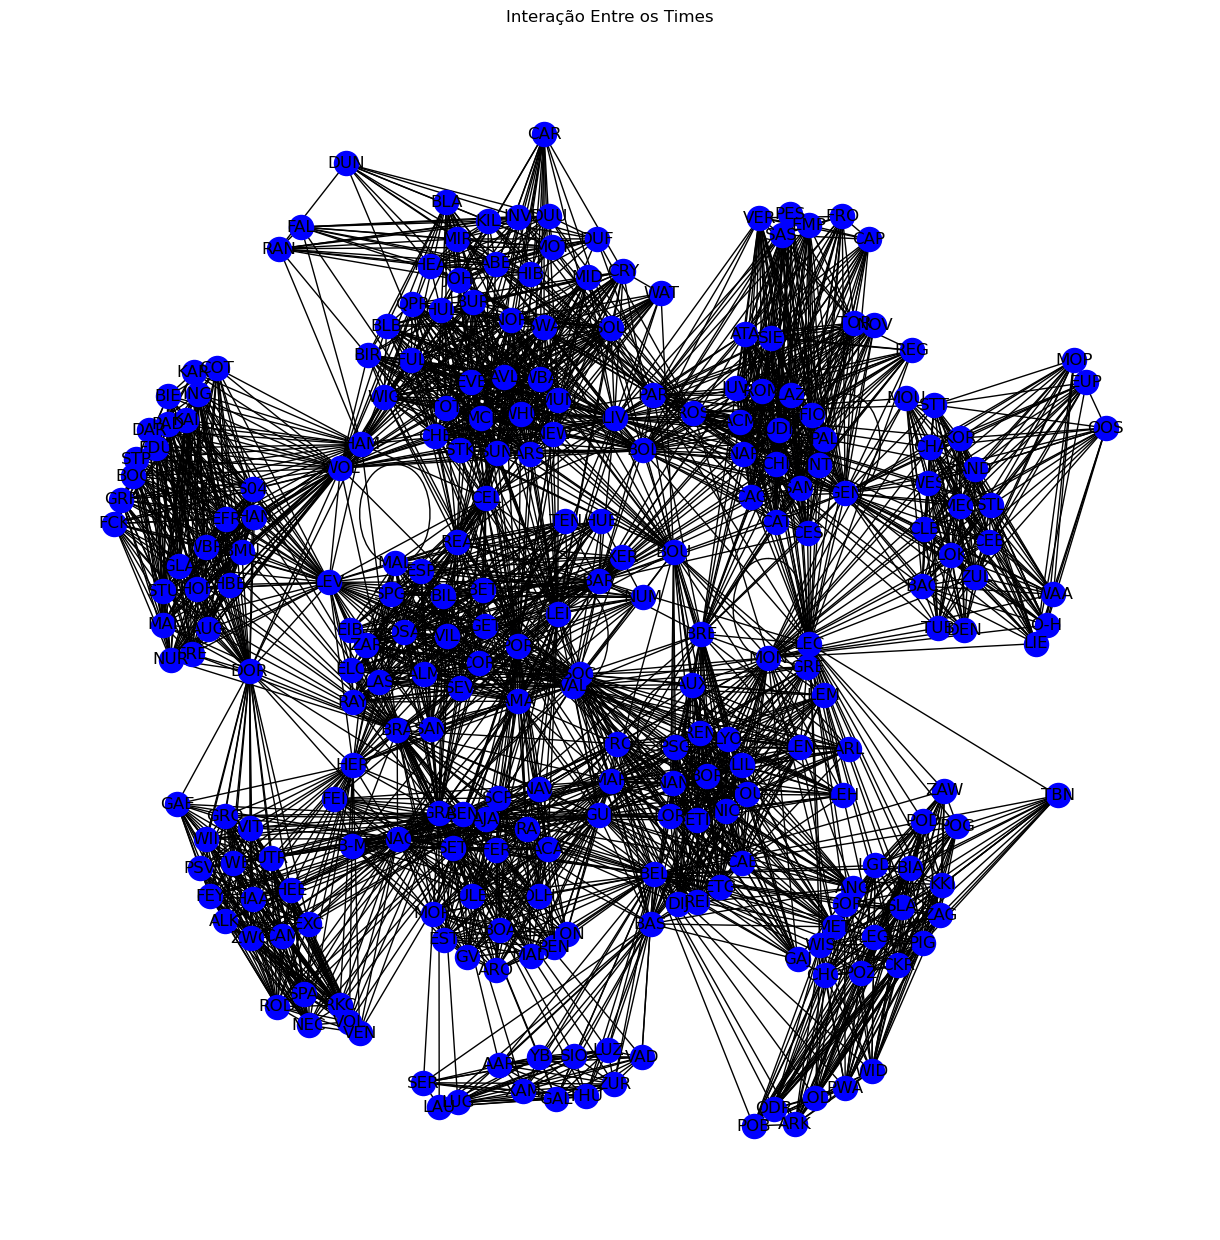

In [82]:
g = nx.from_pandas_edgelist(data,"home_team_sname","away_team_sname")
fig = plt.figure(figsize=(12,12))
nx.draw_kamada_kawai(g,with_labels = True, node_color = 'blue')
plt.title("Interação Entre os Times")
fig.set_facecolor("white")
plt.show()

In [83]:
data.head()

,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,country,league,_merge,year,home_team_lname,home_team_sname,away_team_lname,away_team_sname,total_goal
0,1,1,2008/2009,1,2008-08-17,492473,9987,9993,1,1,Belgium,Belgium Jupiler League,both,2008,KRC Genk,GEN,Beerschot AC,BAC,2
1,1,1,2008/2009,1,2008-08-16,492474,10000,9994,0,0,Belgium,Belgium Jupiler League,both,2008,SV Zulte-Waregem,ZUL,Sporting Lokeren,LOK,0
2,1,1,2008/2009,1,2008-08-16,492475,9984,8635,0,3,Belgium,Belgium Jupiler League,both,2008,KSV Cercle Brugge,CEB,RSC Anderlecht,AND,3
3,1,1,2008/2009,1,2008-08-17,492476,9991,9998,5,0,Belgium,Belgium Jupiler League,both,2008,KAA Gent,GEN,RAEC Mons,MON,5
4,1,1,2008/2009,1,2008-08-16,492477,7947,9985,1,3,Belgium,Belgium Jupiler League,both,2008,FCV Dender EH,DEN,Standard de Liège,STL,4


### Criar novas colunas na base

Time Vencedor

In [84]:
def label(data):
    if data["home_team_goal"] > data["away_team_goal"]:
        return data["home_team_lname"]
    elif data["away_team_goal"] > data["home_team_goal"]:
        return data["away_team_lname"]
    elif data["home_team_goal"] == data["away_team_goal"]:
        return "DRAW"


In [85]:
data["win"] = data.apply(lambda data:label(data),axis=1)

In [86]:
data.head()

,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,country,league,_merge,year,home_team_lname,home_team_sname,away_team_lname,away_team_sname,total_goal,win
0,1,1,2008/2009,1,2008-08-17,492473,9987,9993,1,1,Belgium,Belgium Jupiler League,both,2008,KRC Genk,GEN,Beerschot AC,BAC,2,DRAW
1,1,1,2008/2009,1,2008-08-16,492474,10000,9994,0,0,Belgium,Belgium Jupiler League,both,2008,SV Zulte-Waregem,ZUL,Sporting Lokeren,LOK,0,DRAW
2,1,1,2008/2009,1,2008-08-16,492475,9984,8635,0,3,Belgium,Belgium Jupiler League,both,2008,KSV Cercle Brugge,CEB,RSC Anderlecht,AND,3,RSC Anderlecht
3,1,1,2008/2009,1,2008-08-17,492476,9991,9998,5,0,Belgium,Belgium Jupiler League,both,2008,KAA Gent,GEN,RAEC Mons,MON,5,KAA Gent
4,1,1,2008/2009,1,2008-08-16,492477,7947,9985,1,3,Belgium,Belgium Jupiler League,both,2008,FCV Dender EH,DEN,Standard de Liège,STL,4,Standard de Liège


Outcome do jogo

In [87]:
def lab(data):
    if data["home_team_goal"] > data["away_team_goal"]:
        return "HOME TEAM WIN"
    elif data["away_team_goal"] > data["home_team_goal"]:
        return "AWAY TEAM WIN"
    elif data["home_team_goal"] == data["away_team_goal"]:
        return "DRAW"

data["outcome_side"] = data.apply(lambda data:lab(data),axis = 1)

In [88]:
data.head()

,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,...,league,_merge,year,home_team_lname,home_team_sname,away_team_lname,away_team_sname,total_goal,win,outcome_side
0,1,1,2008/2009,1,2008-08-17,492473,9987,9993,1,1,...,Belgium Jupiler League,both,2008,KRC Genk,GEN,Beerschot AC,BAC,2,DRAW,DRAW
1,1,1,2008/2009,1,2008-08-16,492474,10000,9994,0,0,...,Belgium Jupiler League,both,2008,SV Zulte-Waregem,ZUL,Sporting Lokeren,LOK,0,DRAW,DRAW
2,1,1,2008/2009,1,2008-08-16,492475,9984,8635,0,3,...,Belgium Jupiler League,both,2008,KSV Cercle Brugge,CEB,RSC Anderlecht,AND,3,RSC Anderlecht,AWAY TEAM WIN
3,1,1,2008/2009,1,2008-08-17,492476,9991,9998,5,0,...,Belgium Jupiler League,both,2008,KAA Gent,GEN,RAEC Mons,MON,5,KAA Gent,HOME TEAM WIN
4,1,1,2008/2009,1,2008-08-16,492477,7947,9985,1,3,...,Belgium Jupiler League,both,2008,FCV Dender EH,DEN,Standard de Liège,STL,4,Standard de Liège,AWAY TEAM WIN


Time Perdedor

In [89]:
def labe(data):
    if data["home_team_goal"] < data["away_team_goal"]:
        return data["home_team_lname"]
    elif data["away_team_goal"] < data["home_team_goal"]:
        return data["away_team_lname"]
    elif data["home_team_goal"] == data["away_team_goal"]:
        return "DRAW"

data["lost"] = data.apply(lambda data:labe(data),axis = 1)

In [90]:
data.head()

,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,...,_merge,year,home_team_lname,home_team_sname,away_team_lname,away_team_sname,total_goal,win,outcome_side,lost
0,1,1,2008/2009,1,2008-08-17,492473,9987,9993,1,1,...,both,2008,KRC Genk,GEN,Beerschot AC,BAC,2,DRAW,DRAW,DRAW
1,1,1,2008/2009,1,2008-08-16,492474,10000,9994,0,0,...,both,2008,SV Zulte-Waregem,ZUL,Sporting Lokeren,LOK,0,DRAW,DRAW,DRAW
2,1,1,2008/2009,1,2008-08-16,492475,9984,8635,0,3,...,both,2008,KSV Cercle Brugge,CEB,RSC Anderlecht,AND,3,RSC Anderlecht,AWAY TEAM WIN,KSV Cercle Brugge
3,1,1,2008/2009,1,2008-08-17,492476,9991,9998,5,0,...,both,2008,KAA Gent,GEN,RAEC Mons,MON,5,KAA Gent,HOME TEAM WIN,RAEC Mons
4,1,1,2008/2009,1,2008-08-16,492477,7947,9985,1,3,...,both,2008,FCV Dender EH,DEN,Standard de Liège,STL,4,Standard de Liège,AWAY TEAM WIN,FCV Dender EH


In [91]:
data["outcome_side"].value_counts()

HOME TEAM WIN    11917
AWAY TEAM WIN     7466
DRAW              6596
Name: outcome_side, dtype: int64

### Proporção dos jogos por outcome

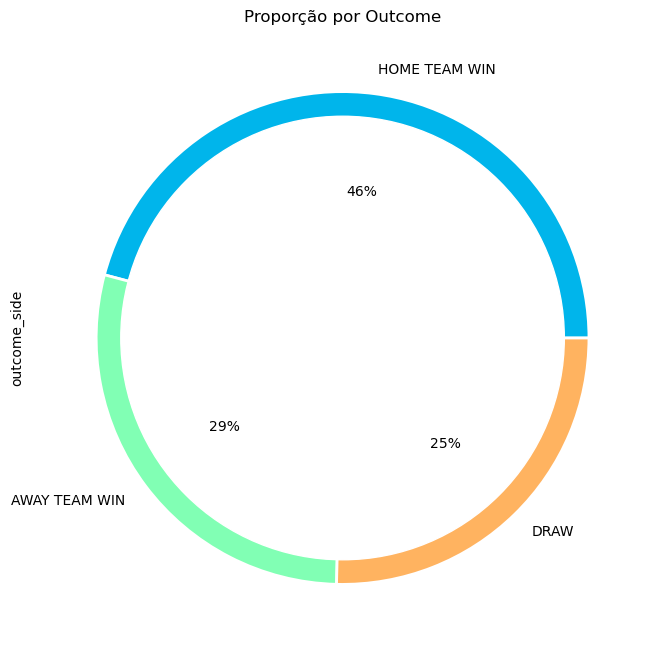

In [92]:
plt.figure(figsize=(8,8))

data["outcome_side"].value_counts().plot.pie(autopct = "%1.0f%%", # Mostrar o valor percentual
                                             colors =sns.color_palette("rainbow",3),
                                             wedgeprops = {"linewidth":2,"edgecolor":"white"})

my_circ = plt.Circle((0,0),.9,color = "white") # Experimenta tirar essa linha do plot
plt.gca().add_artist(my_circ)

plt.title("Proporção por Outcome")
plt.show()

In [93]:
data["win"].value_counts()

DRAW                     6596
FC Barcelona              234
Real Madrid CF            228
Celtic                    218
FC Bayern Munich          193
                         ... 
SpVgg Greuther Fürth        4
FC Dordrecht                4
DSC Arminia Bielefeld       4
Córdoba CF                  3
AC Arles-Avignon            3
Name: win, Length: 297, dtype: int64

In [94]:
win = data["win"].value_counts()[1:].reset_index()
lost = data["lost"].value_counts()[1:].reset_index()

In [95]:
win.head()

,index,win
0,FC Barcelona,234
1,Real Madrid CF,228
2,Celtic,218
3,FC Bayern Munich,193
4,Manchester United,192


#### Juntar win,draw e lost dos times com of jogos

In [96]:
xy.head()

,team,league,matches,goals
75,FC Barcelona,Spain LIGA BBVA,304,849
211,Real Madrid CF,Spain LIGA BBVA,304,843
49,Celtic,Scotland Premier League,304,695
77,FC Bayern Munich,Germany 1. Bundesliga,272,653
184,PSV,Netherlands Eredivisie,272,652


In [97]:
xy['goalXmatch'] = xy['goals']/xy['matches']

In [98]:
xy.head()

,team,league,matches,goals,goalXmatch
75,FC Barcelona,Spain LIGA BBVA,304,849,2.792763
211,Real Madrid CF,Spain LIGA BBVA,304,843,2.773026
49,Celtic,Scotland Premier League,304,695,2.286184
77,FC Bayern Munich,Germany 1. Bundesliga,272,653,2.400735
184,PSV,Netherlands Eredivisie,272,652,2.397059


In [99]:
xy.sort_values(by = "goalXmatch",ascending = False)

,team,league,matches,goals,goalXmatch
75,FC Barcelona,Spain LIGA BBVA,304,849,2.792763
211,Real Madrid CF,Spain LIGA BBVA,304,843,2.773026
77,FC Bayern Munich,Germany 1. Bundesliga,272,653,2.400735
184,PSV,Netherlands Eredivisie,272,652,2.397059
15,Ajax,Netherlands Eredivisie,272,647,2.378676
...,...,...,...,...,...
118,Grenoble Foot 38,France Ligue 1,76,55,0.723684
189,Pescara,Italy Serie A,38,27,0.710526
78,FC Dordrecht,Netherlands Eredivisie,34,24,0.705882
56,Córdoba CF,Spain LIGA BBVA,38,22,0.578947


In [100]:
xy.head()

,team,league,matches,goals,goalXmatch
75,FC Barcelona,Spain LIGA BBVA,304,849,2.792763
211,Real Madrid CF,Spain LIGA BBVA,304,843,2.773026
49,Celtic,Scotland Premier League,304,695,2.286184
77,FC Bayern Munich,Germany 1. Bundesliga,272,653,2.400735
184,PSV,Netherlands Eredivisie,272,652,2.397059


In [101]:
win

,index,win
0,FC Barcelona,234
1,Real Madrid CF,228
2,Celtic,218
3,FC Bayern Munich,193
4,Manchester United,192
...,...,...
291,SpVgg Greuther Fürth,4
292,FC Dordrecht,4
293,DSC Arminia Bielefeld,4
294,Córdoba CF,3


In [102]:
f = xy.merge(win,left_on="team",right_on="index",how="left")
f = f.drop("index",axis =1)
f = f.rename(columns={"outcome":"wins"})
f = f.merge(lost,left_on="team",right_on="index",how="left")
f = f.drop("index",axis =1)

In [103]:
f.head()

,team,league,matches,goals,goalXmatch,win,lost
0,FC Barcelona,Spain LIGA BBVA,304,849,2.792763,234,27
1,Real Madrid CF,Spain LIGA BBVA,304,843,2.773026,228,40
2,Celtic,Scotland Premier League,304,695,2.286184,218,36
3,FC Bayern Munich,Germany 1. Bundesliga,272,653,2.400735,193,35
4,PSV,Netherlands Eredivisie,272,652,2.397059,178,47


In [104]:
data[data["outcome_side"] == "DRAW"][["home_team_lname","away_team_lname"]]

,home_team_lname,away_team_lname
0,KRC Genk,Beerschot AC
1,SV Zulte-Waregem,Sporting Lokeren
5,KV Mechelen,Club Brugge KV
6,KSV Roeselare,KV Kortrijk
12,Sporting Lokeren,RAEC Mons
...,...,...
25952,FC Vaduz,FC Sion
25958,FC Vaduz,Grasshopper Club Zürich
25971,FC Luzern,Grasshopper Club Zürich
25972,FC Zürich,FC Thun


In [105]:
dr = data[data["outcome_side"] == "DRAW"][["home_team_lname","away_team_lname"]]
l  = dr["home_team_lname"].value_counts().reset_index()
v  = dr["away_team_lname"].value_counts().reset_index()
l  = l.rename(columns={'index':"team", 'home_team_lname':"draw"})
v  = v.rename(columns={'index':"team", 'away_team_lname':"draw"})
lv = pd.concat([l,v])
lv = lv.groupby("team")["draw"].sum().reset_index()
f = f.merge(lv,left_on="team",right_on="team",how ="left")

In [106]:
f.head()

,team,league,matches,goals,goalXmatch,win,lost,draw
0,FC Barcelona,Spain LIGA BBVA,304,849,2.792763,234,27,43
1,Real Madrid CF,Spain LIGA BBVA,304,843,2.773026,228,40,36
2,Celtic,Scotland Premier League,304,695,2.286184,218,36,50
3,FC Bayern Munich,Germany 1. Bundesliga,272,653,2.400735,193,35,44
4,PSV,Netherlands Eredivisie,272,652,2.397059,178,47,47


### Performance dos melhores times

In [107]:
f = f.sort_values(by="goals",ascending=False)

In [108]:
f.head()

,team,league,matches,goals,goalXmatch,win,lost,draw
0,FC Barcelona,Spain LIGA BBVA,304,849,2.792763,234,27,43
1,Real Madrid CF,Spain LIGA BBVA,304,843,2.773026,228,40,36
2,Celtic,Scotland Premier League,304,695,2.286184,218,36,50
3,FC Bayern Munich,Germany 1. Bundesliga,272,653,2.400735,193,35,44
4,PSV,Netherlands Eredivisie,272,652,2.397059,178,47,47


In [109]:
f_new = f.copy()

In [110]:
f_new

,team,league,matches,goals,goalXmatch,win,lost,draw
0,FC Barcelona,Spain LIGA BBVA,304,849,2.792763,234,27,43
1,Real Madrid CF,Spain LIGA BBVA,304,843,2.773026,228,40,36
2,Celtic,Scotland Premier League,304,695,2.286184,218,36,50
3,FC Bayern Munich,Germany 1. Bundesliga,272,653,2.400735,193,35,44
4,PSV,Netherlands Eredivisie,272,652,2.397059,178,47,47
...,...,...,...,...,...,...,...,...
291,Amadora,Portugal Liga ZON Sagres,30,26,0.866667,8,12,10
292,Trofense,Portugal Liga ZON Sagres,30,25,0.833333,5,17,8
293,FC Dordrecht,Netherlands Eredivisie,34,24,0.705882,4,22,8
294,Córdoba CF,Spain LIGA BBVA,38,22,0.578947,3,24,11


In [111]:
f_new.goals

0      849
1      843
2      695
3      653
4      652
      ... 
291     26
292     25
293     24
294     22
295     21
Name: goals, Length: 296, dtype: int64

In [112]:
f_new.index = f_new.team

In [113]:
f_new.head()

,team,league,matches,goals,goalXmatch,win,lost,draw
team,,,,,,,,
FC Barcelona,FC Barcelona,Spain LIGA BBVA,304,849,2.792763,234,27,43
Real Madrid CF,Real Madrid CF,Spain LIGA BBVA,304,843,2.773026,228,40,36
Celtic,Celtic,Scotland Premier League,304,695,2.286184,218,36,50
FC Bayern Munich,FC Bayern Munich,Germany 1. Bundesliga,272,653,2.400735,193,35,44
PSV,PSV,Netherlands Eredivisie,272,652,2.397059,178,47,47


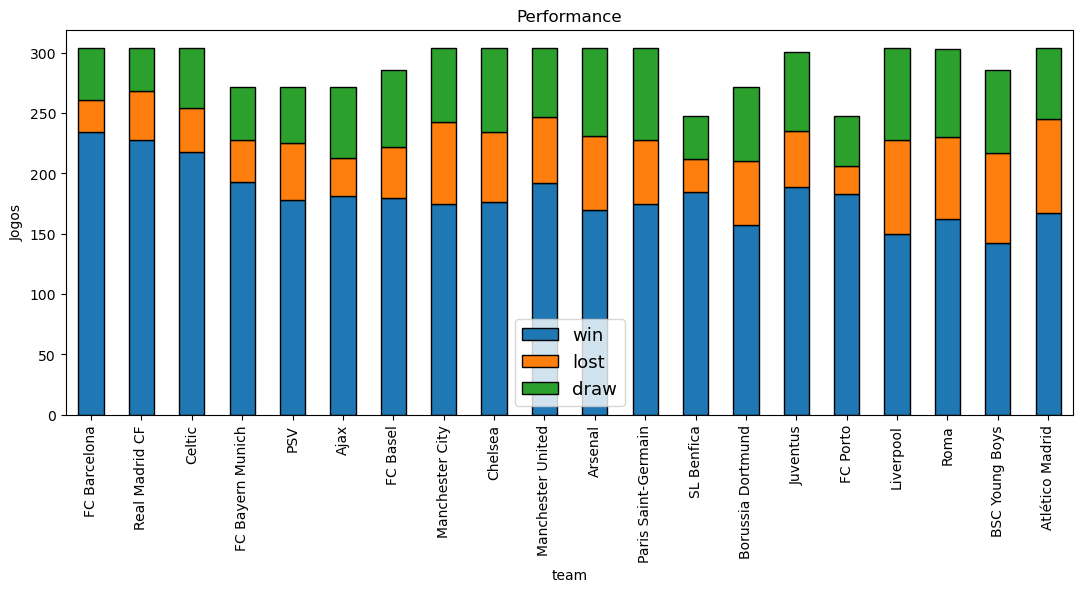

In [114]:
f_new[["win","lost","draw"]][:20].plot(kind = "bar",figsize=(13,5),
                                   stacked =True,linewidth = 1,
                                   edgecolor = ["k" for i in range(20)]
                                  )

plt.legend(loc="best",prop = {"size" : 13})
plt.title("Performance")
plt.ylabel("Jogos")
plt.show()

In [115]:
f_new[["win","lost","draw"]][:20]

,win,lost,draw
team,,,
FC Barcelona,234,27,43
Real Madrid CF,228,40,36
Celtic,218,36,50
FC Bayern Munich,193,35,44
PSV,178,47,47
Ajax,181,32,59
FC Basel,180,42,64
Manchester City,175,68,61
Chelsea,176,58,70


In [116]:
f.index

Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
            286, 287, 288, 289, 290, 291, 292, 293, 294, 295],
           dtype='int64', length=296)

In [117]:
f

,team,league,matches,goals,goalXmatch,win,lost,draw
0,FC Barcelona,Spain LIGA BBVA,304,849,2.792763,234,27,43
1,Real Madrid CF,Spain LIGA BBVA,304,843,2.773026,228,40,36
2,Celtic,Scotland Premier League,304,695,2.286184,218,36,50
3,FC Bayern Munich,Germany 1. Bundesliga,272,653,2.400735,193,35,44
4,PSV,Netherlands Eredivisie,272,652,2.397059,178,47,47
...,...,...,...,...,...,...,...,...
291,Amadora,Portugal Liga ZON Sagres,30,26,0.866667,8,12,10
292,Trofense,Portugal Liga ZON Sagres,30,25,0.833333,5,17,8
293,FC Dordrecht,Netherlands Eredivisie,34,24,0.705882,4,22,8
294,Córdoba CF,Spain LIGA BBVA,38,22,0.578947,3,24,11


In [118]:
f['lost'].mean()

65.48310810810811

### Plot de Area por atributo dos jogos

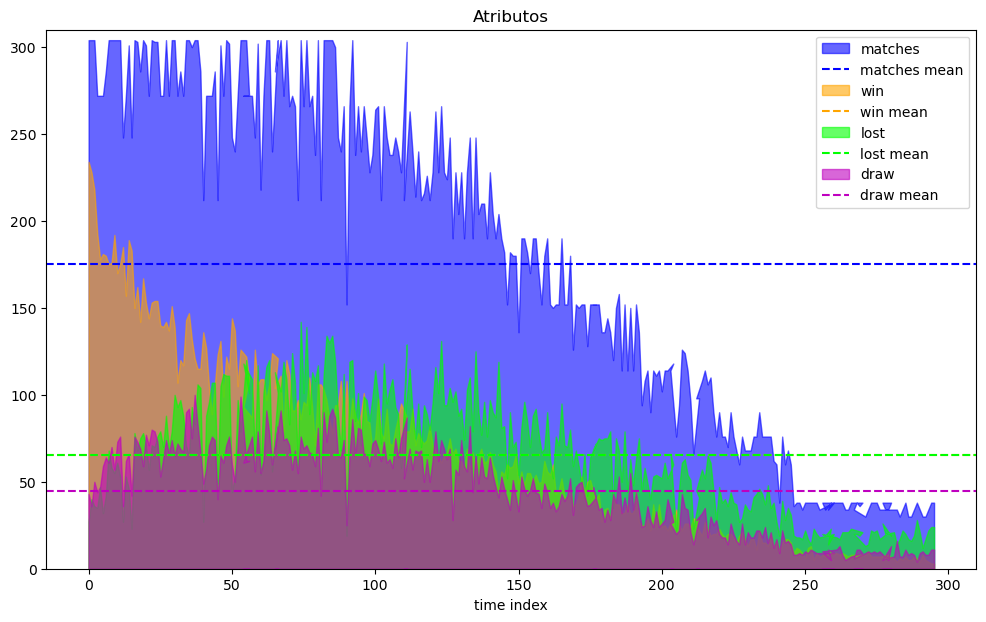

In [119]:
plt.figure(figsize=(12,7))

cols = ["matches","win","lost","draw"]
c    = ["b","orange","lime","m"]
length = len(cols)

for i,j,k in zip(cols,range(length),c):
    plt.stackplot(f.index,f[i],alpha=.6,color = k,labels=[i])
    plt.axhline(f[i].mean(),color=k,linestyle="dashed",label=i+ " mean") # Observar a construção da legenda
    plt.legend(loc="best")
    plt.title("Atributos")
    plt.xlabel("time index")

plt.ylim([0, 310])
plt.show() 

In [117]:
data

,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,...,_merge,year,home_team_lname,home_team_sname,away_team_lname,away_team_sname,total_goal,win,outcome_side,lost
0,1,1,2008/2009,1,2008-08-17,492473,9987,9993,1,1,...,both,2008,KRC Genk,GEN,Beerschot AC,BAC,2,DRAW,DRAW,DRAW
1,1,1,2008/2009,1,2008-08-16,492474,10000,9994,0,0,...,both,2008,SV Zulte-Waregem,ZUL,Sporting Lokeren,LOK,0,DRAW,DRAW,DRAW
2,1,1,2008/2009,1,2008-08-16,492475,9984,8635,0,3,...,both,2008,KSV Cercle Brugge,CEB,RSC Anderlecht,AND,3,RSC Anderlecht,AWAY TEAM WIN,KSV Cercle Brugge
3,1,1,2008/2009,1,2008-08-17,492476,9991,9998,5,0,...,both,2008,KAA Gent,GEN,RAEC Mons,MON,5,KAA Gent,HOME TEAM WIN,RAEC Mons
4,1,1,2008/2009,1,2008-08-16,492477,7947,9985,1,3,...,both,2008,FCV Dender EH,DEN,Standard de Liège,STL,4,Standard de Liège,AWAY TEAM WIN,FCV Dender EH
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25974,24558,24558,2015/2016,9,2015-09-22,1992091,10190,10191,1,0,...,both,2015,FC St. Gallen,GAL,FC Thun,THU,1,FC St. Gallen,HOME TEAM WIN,FC Thun
25975,24558,24558,2015/2016,9,2015-09-23,1992092,9824,10199,1,2,...,both,2015,FC Vaduz,VAD,FC Luzern,LUZ,3,FC Luzern,AWAY TEAM WIN,FC Vaduz
25976,24558,24558,2015/2016,9,2015-09-23,1992093,9956,10179,2,0,...,both,2015,Grasshopper Club Zürich,GRA,FC Sion,SIO,2,Grasshopper Club Zürich,HOME TEAM WIN,FC Sion
25977,24558,24558,2015/2016,9,2015-09-22,1992094,7896,10243,0,0,...,both,2015,Lugano,LUG,FC Zürich,ZUR,0,DRAW,DRAW,DRAW


In [263]:
data.groupby(["league","win"]).agg({"win":"count", "match_api_id":"count"})

win  match_api_id
league                   win                                       
Belgium Jupiler League   Beerschot AC              40            40
                         Club Brugge KV           123           123
                         DRAW                     425           425
                         FCV Dender EH              9             9
                         KAA Gent                 109           109
...                                               ...           ...
Switzerland Super League FC Zürich                120           120
                         Grasshopper Club Zürich  115           115
                         Lugano                     9             9
                         Neuchâtel Xamax           36            36
                         Servette FC               20            20

[307 rows x 2 columns]

In [264]:
x = pd.DataFrame(data.groupby(["league","win"]).agg({"win":"count"}, {"match_api_id":"count"}))

In [265]:
x

win
league                   win                         
Belgium Jupiler League   Beerschot AC              40
                         Club Brugge KV           123
                         DRAW                     425
                         FCV Dender EH              9
                         KAA Gent                 109
...                                               ...
Switzerland Super League FC Zürich                120
                         Grasshopper Club Zürich  115
                         Lugano                     9
                         Neuchâtel Xamax           36
                         Servette FC               20

[307 rows x 1 columns]

In [266]:
x = x.rename(columns={"win":"team"}).reset_index()

In [267]:
x

,league,win,team
0,Belgium Jupiler League,Beerschot AC,40
1,Belgium Jupiler League,Club Brugge KV,123
2,Belgium Jupiler League,DRAW,425
3,Belgium Jupiler League,FCV Dender EH,9
4,Belgium Jupiler League,KAA Gent,109
...,...,...,...
302,Switzerland Super League,FC Zürich,120
303,Switzerland Super League,Grasshopper Club Zürich,115
304,Switzerland Super League,Lugano,9
305,Switzerland Super League,Neuchâtel Xamax,36


In [268]:
x = x.rename(columns={"win":"team","team":"win"})

In [269]:
x

,league,team,win
0,Belgium Jupiler League,Beerschot AC,40
1,Belgium Jupiler League,Club Brugge KV,123
2,Belgium Jupiler League,DRAW,425
3,Belgium Jupiler League,FCV Dender EH,9
4,Belgium Jupiler League,KAA Gent,109
...,...,...,...
302,Switzerland Super League,FC Zürich,120
303,Switzerland Super League,Grasshopper Club Zürich,115
304,Switzerland Super League,Lugano,9
305,Switzerland Super League,Neuchâtel Xamax,36


In [270]:
x = x.sort_values(by="win",ascending=False)

In [271]:
x

,league,team,win
67,France Ligue 1,DRAW,859
136,Italy Serie A,DRAW,796
36,England Premier League,DRAW,783
263,Spain LIGA BBVA,DRAW,704
103,Germany 1. Bundesliga,DRAW,597
...,...,...,...
122,Germany 1. Bundesliga,SpVgg Greuther Fürth,4
166,Netherlands Eredivisie,FC Dordrecht,4
104,Germany 1. Bundesliga,DSC Arminia Bielefeld,4
262,Spain LIGA BBVA,Córdoba CF,3


In [272]:
x[x["team"] != "DRAW"]

,league,team,win
265,Spain LIGA BBVA,FC Barcelona,234
279,Spain LIGA BBVA,Real Madrid CF,228
240,Scotland Premier League,Celtic,218
108,Germany 1. Bundesliga,FC Bayern Munich,193
43,England Premier League,Manchester United,192
...,...,...,...
122,Germany 1. Bundesliga,SpVgg Greuther Fürth,4
166,Netherlands Eredivisie,FC Dordrecht,4
104,Germany 1. Bundesliga,DSC Arminia Bielefeld,4
262,Spain LIGA BBVA,Córdoba CF,3


In [274]:
x = x[x["team"] != "DRAW"]

In [275]:
x

,league,team,win
265,Spain LIGA BBVA,FC Barcelona,234
279,Spain LIGA BBVA,Real Madrid CF,228
240,Scotland Premier League,Celtic,218
108,Germany 1. Bundesliga,FC Bayern Munich,193
43,England Premier League,Manchester United,192
...,...,...,...
122,Germany 1. Bundesliga,SpVgg Greuther Fürth,4
166,Netherlands Eredivisie,FC Dordrecht,4
104,Germany 1. Bundesliga,DSC Arminia Bielefeld,4
262,Spain LIGA BBVA,Córdoba CF,3


In [276]:
x.drop_duplicates()

,league,team,win
265,Spain LIGA BBVA,FC Barcelona,234
279,Spain LIGA BBVA,Real Madrid CF,228
240,Scotland Premier League,Celtic,218
108,Germany 1. Bundesliga,FC Bayern Munich,193
43,England Premier League,Manchester United,192
...,...,...,...
122,Germany 1. Bundesliga,SpVgg Greuther Fürth,4
166,Netherlands Eredivisie,FC Dordrecht,4
104,Germany 1. Bundesliga,DSC Arminia Bielefeld,4
262,Spain LIGA BBVA,Córdoba CF,3


In [277]:
x.drop_duplicates(subset=["league"],keep="first").reset_index()

,index,league,team,win
0,265,Spain LIGA BBVA,FC Barcelona,234
1,240,Scotland Premier League,Celtic,218
2,108,Germany 1. Bundesliga,FC Bayern Munich,193
3,43,England Premier League,Manchester United,192
4,143,Italy Serie A,Juventus,189
5,231,Portugal Liga ZON Sagres,SL Benfica,185
6,162,Netherlands Eredivisie,Ajax,181
7,295,Switzerland Super League,FC Basel,180
8,85,France Ligue 1,Paris Saint-Germain,175
9,195,Poland Ekstraklasa,Legia Warszawa,137


### Melhores Times Por Liga

In [278]:
g = data.groupby(["home_team_lname","league"]).agg({"match_api_id":"count","home_team_goal":"sum"}).reset_index()
l = data.groupby(["away_team_lname","league"]).agg({"match_api_id":"count","away_team_goal":"sum"}).reset_index()
g = g.rename(columns={'home_team_lname':"team", 'match_api_id':"matches", 'home_team_goal':"goals"})
l = l.rename(columns={'away_team_lname':"team", 'match_api_id':"matches", 'away_team_goal':"goals"})
gl = pd.concat([g,l])
gl = gl.groupby(["team","league"])[["matches","goals"]].sum().reset_index()
gl = gl.sort_values(by="goals",ascending=False)

In [279]:
gl

,team,league,matches,goals
75,FC Barcelona,Spain LIGA BBVA,304,849
211,Real Madrid CF,Spain LIGA BBVA,304,843
49,Celtic,Scotland Premier League,304,695
77,FC Bayern Munich,Germany 1. Bundesliga,272,653
184,PSV,Netherlands Eredivisie,272,652
...,...,...,...,...
16,Amadora,Portugal Liga ZON Sagres,30,26
264,Trofense,Portugal Liga ZON Sagres,30,25
78,FC Dordrecht,Netherlands Eredivisie,34,24
56,Córdoba CF,Spain LIGA BBVA,38,22


In [280]:
x = pd.DataFrame(data.groupby(["league","win"]).agg({"win":"count"}, {"match_api_id":"count"}))
x = x.rename(columns={"win":"team"}).reset_index()
x = x.rename(columns={"win":"team","team":"win"})
x = x.sort_values(by="win",ascending=False)
x = x[x["team"] != "DRAW"]
x = x.drop_duplicates(subset=["league"],keep="first")

In [281]:
x

,league,team,win
265,Spain LIGA BBVA,FC Barcelona,234
240,Scotland Premier League,Celtic,218
108,Germany 1. Bundesliga,FC Bayern Munich,193
43,England Premier League,Manchester United,192
143,Italy Serie A,Juventus,189
231,Portugal Liga ZON Sagres,SL Benfica,185
162,Netherlands Eredivisie,Ajax,181
295,Switzerland Super League,FC Basel,180
85,France Ligue 1,Paris Saint-Germain,175
195,Poland Ekstraklasa,Legia Warszawa,137


In [282]:
a = gl.merge(x,left_on="team",right_on="team",how ="right")
a = a.drop('league_y', 1)
a = a.drop('goals', 1)
a = a.rename(columns={"league_x":"league"})

In [283]:
a

,team,league,matches,win
0,FC Barcelona,Spain LIGA BBVA,304,234
1,Celtic,Scotland Premier League,304,218
2,FC Bayern Munich,Germany 1. Bundesliga,272,193
3,Manchester United,England Premier League,304,192
4,Juventus,Italy Serie A,301,189
5,SL Benfica,Portugal Liga ZON Sagres,248,185
6,Ajax,Netherlands Eredivisie,272,181
7,FC Basel,Switzerland Super League,286,180
8,Paris Saint-Germain,France Ligue 1,304,175
9,Legia Warszawa,Poland Ekstraklasa,240,137


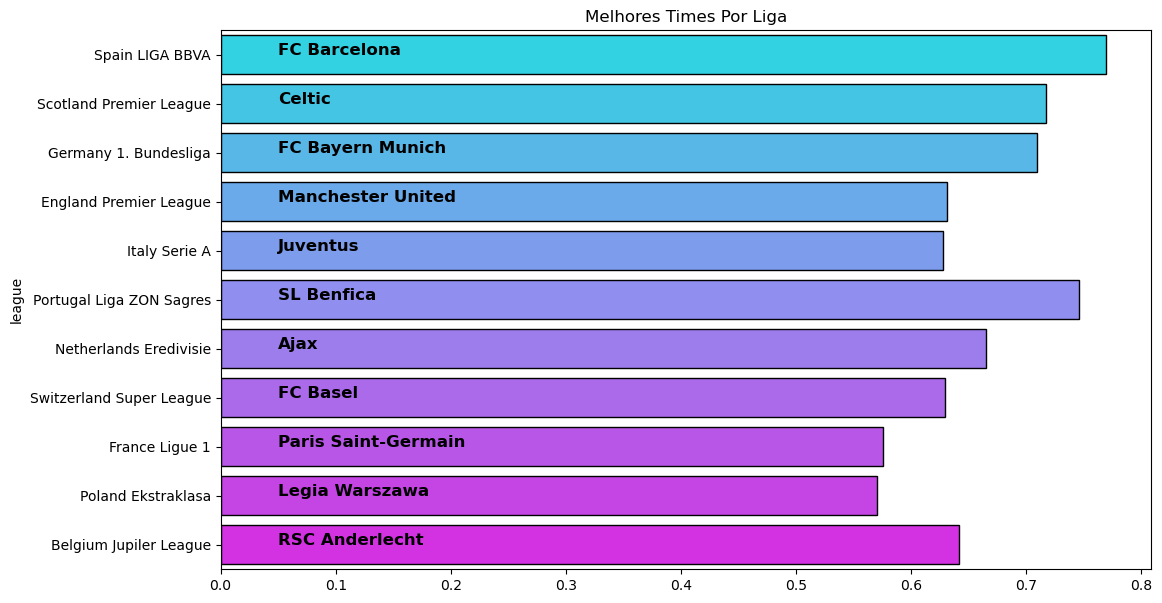

In [284]:
plt.figure(figsize=(12,7))

ax =sns.barplot((a["win"]/a["matches"]),a["league"],palette="cool",
               linewidth = 1 ,edgecolor = ["k" for i in range(10)])

for i,j in enumerate(a["team"]):
    ax.text(.05,i,j,weight = "bold",fontsize = 12)

plt.title("Melhores Times Por Liga")
plt.show()

### Proporção de jogos e gols marcados por liga

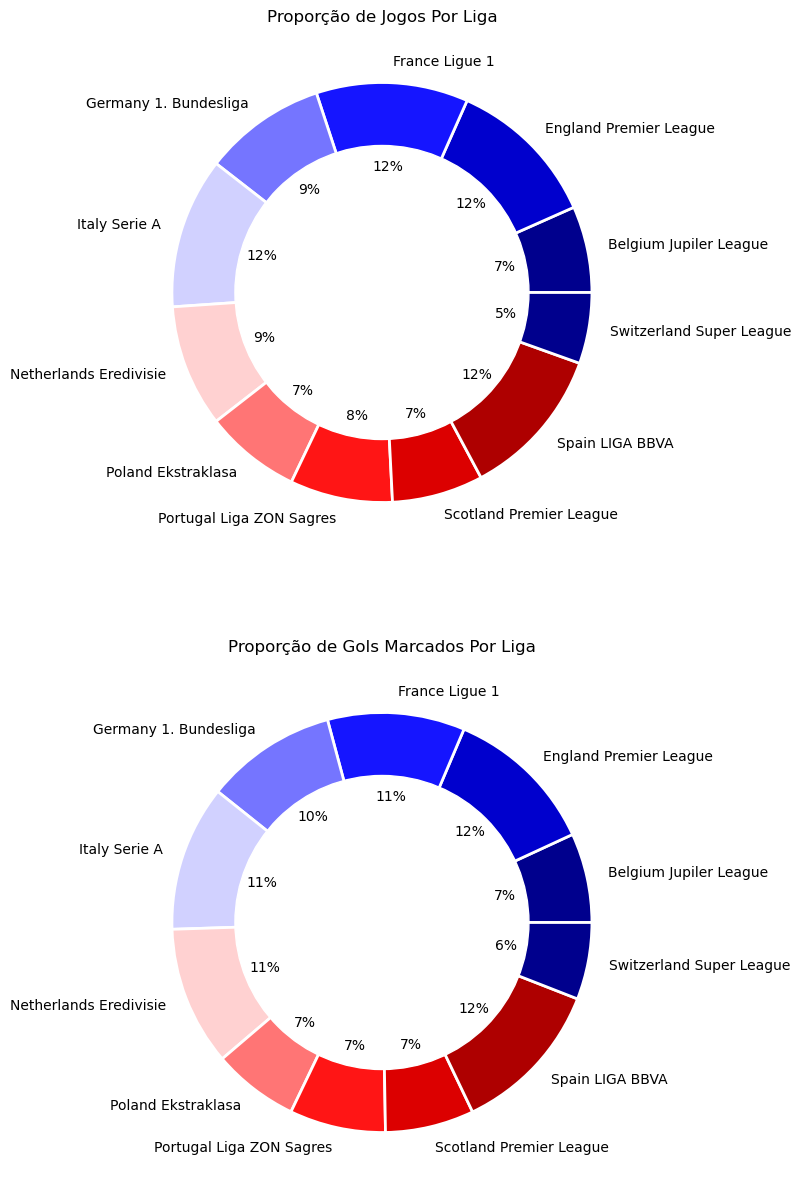

In [140]:
plt.figure(figsize=(7,15))

plt.subplot(211)
agg = data.groupby(["league"]).agg({"match_api_id":"count","total_goal":"sum"})

agg["match_api_id"].plot.pie(colors=sns.color_palette("seismic",10),
                             autopct="%1.0f%%",
                             wedgeprops={"linewidth":2,"edgecolor":"white"})

plt.ylabel("")
my_circ = plt.Circle((0,0),.7,color ="white")
plt.gca().add_artist(my_circ)
plt.title("Proporção de Jogos Por Liga")

plt.subplot(212)
agg["total_goal"].plot.pie(colors=sns.color_palette("seismic",10),
                           autopct="%1.0f%%",
                           wedgeprops={"linewidth":2,"edgecolor":"white"})

plt.ylabel("")
my_circ = plt.Circle((0,0),.7,color ="white")
plt.gca().add_artist(my_circ)
plt.title("Proporção de Gols Marcados Por Liga")
plt.show()

### Melhores Times

Iremos utilizar o WordCloud para construir núvens de palavras

``!pip install wordcloud``

In [285]:
from wordcloud import WordCloud

In [143]:
list(data[data["win"] != "DRAW"]['win'])[0:20]

['RSC Anderlecht',
 'KAA Gent',
 'Standard de Liège',
 'Royal Excel Mouscron',
 'KVC Westerlo',
 'Club Brugge KV',
 'Sporting Charleroi',
 'KAA Gent',
 'KSV Roeselare',
 'KSV Cercle Brugge',
 'KRC Genk',
 'RSC Anderlecht',
 'Sporting Lokeren',
 'KSV Cercle Brugge',
 'Tubize',
 'KVC Westerlo',
 'Standard de Liège',
 'FCV Dender EH',
 'Royal Excel Mouscron',
 'Tubize']

In [286]:
wrd = data[data["win"] != "DRAW"]['win'].to_frame()

In [287]:
wrd

,win
2,RSC Anderlecht
3,KAA Gent
4,Standard de Liège
7,Royal Excel Mouscron
8,KVC Westerlo
...,...
25973,FC Sion
25974,FC St. Gallen
25975,FC Luzern
25976,Grasshopper Club Zürich


In [288]:
wrd["win"].value_counts()

FC Barcelona             234
Real Madrid CF           228
Celtic                   218
FC Bayern Munich         193
Manchester United        192
                        ... 
DSC Arminia Bielefeld      4
SpVgg Greuther Fürth       4
FC Dordrecht               4
Córdoba CF                 3
AC Arles-Avignon           3
Name: win, Length: 296, dtype: int64

In [291]:
wrd["win"].value_counts()[wrd["win"].value_counts() > 100].keys()

Index(['FC Barcelona', 'Real Madrid CF', 'Celtic', 'FC Bayern Munich',
       'Manchester United', 'Juventus', 'SL Benfica', 'FC Porto', 'Ajax',
       'FC Basel', 'PSV', 'Chelsea', 'Paris Saint-Germain', 'Manchester City',
       'Arsenal', 'Atlético Madrid', 'Roma', 'Borussia Dortmund', 'Inter',
       'Milan', 'Olympique Lyonnais', 'Napoli', 'Tottenham Hotspur',
       'Liverpool', 'LOSC Lille', 'Sporting CP', 'FC Twente',
       'Olympique de Marseille', 'Valencia CF', 'BSC Young Boys', 'AZ',
       'Sevilla FC', 'Feyenoord', 'Legia Warszawa', 'Bayer 04 Leverkusen',
       'RSC Anderlecht', 'Fiorentina', 'Lazio', 'FC Schalke 04', 'SC Braga',
       'Girondins de Bordeaux', 'Lech Poznań', 'Club Brugge KV', 'Motherwell',
       'Athletic Club de Bilbao', 'AS Saint-Étienne', 'Everton', 'FC Zürich',
       'Aberdeen', 'VfL Wolfsburg', 'Dundee United', 'Udinese',
       'Grasshopper Club Zürich', 'Villarreal CF', 'Stade Rennais FC',
       'Montpellier Hérault SC', 'Borussia Mönchenglad

In [148]:
wrd["win"].value_counts()[wrd["win"].value_counts() > 100].keys().str.replace(" ","")

Index(['FCBarcelona', 'RealMadridCF', 'Celtic', 'FCBayernMunich',
       'ManchesterUnited', 'Juventus', 'SLBenfica', 'FCPorto', 'Ajax',
       'FCBasel', 'PSV', 'Chelsea', 'ParisSaint-Germain', 'ManchesterCity',
       'Arsenal', 'AtléticoMadrid', 'Roma', 'BorussiaDortmund', 'Inter',
       'Milan', 'OlympiqueLyonnais', 'Napoli', 'TottenhamHotspur', 'Liverpool',
       'LOSCLille', 'SportingCP', 'FCTwente', 'OlympiquedeMarseille',
       'ValenciaCF', 'BSCYoungBoys', 'AZ', 'SevillaFC', 'Feyenoord',
       'LegiaWarszawa', 'Bayer04Leverkusen', 'RSCAnderlecht', 'Fiorentina',
       'Lazio', 'FCSchalke04', 'SCBraga', 'GirondinsdeBordeaux', 'LechPoznań',
       'ClubBruggeKV', 'Motherwell', 'AthleticClubdeBilbao', 'ASSaint-Étienne',
       'Everton', 'FCZürich', 'Aberdeen', 'VfLWolfsburg', 'DundeeUnited',
       'Udinese', 'GrasshopperClubZürich', 'VillarrealCF', 'StadeRennaisFC',
       'MontpellierHéraultSC', 'BorussiaMönchengladbach', 'FCGroningen',
       'KAAGent', 'Rangers', 'WisłaK

In [292]:
wrd = wrd["win"].value_counts()[wrd["win"].value_counts() > 100].keys().str.replace(" ","")

In [293]:
wrd = pd.DataFrame(wrd)

In [295]:
wrd

,0
0,FCBarcelona
1,RealMadridCF
2,Celtic
3,FCBayernMunich
4,ManchesterUnited
...,...
67,Vitesse
68,FCLuzern
69,FCSion
70,ToulouseFC


In [296]:
wrd[0]

0           FCBarcelona
1          RealMadridCF
2                Celtic
3        FCBayernMunich
4      ManchesterUnited
            ...        
67              Vitesse
68             FCLuzern
69               FCSion
70           ToulouseFC
71    HeartofMidlothian
Name: 0, Length: 72, dtype: object

In [297]:
wordList = str(wrd[0])

In [298]:
wordList

'0           FCBarcelona\n1          RealMadridCF\n2                Celtic\n3        FCBayernMunich\n4      ManchesterUnited\n            ...        \n67              Vitesse\n68             FCLuzern\n69               FCSion\n70           ToulouseFC\n71    HeartofMidlothian\nName: 0, Length: 72, dtype: object'

In [302]:
"-".join(["a","b","c"])

'a-b-c'

In [305]:
wordList.split("\n")

['0           FCBarcelona',
 '1          RealMadridCF',
 '2                Celtic',
 '3        FCBayernMunich',
 '4      ManchesterUnited',
 '            ...        ',
 '67              Vitesse',
 '68             FCLuzern',
 '69               FCSion',
 '70           ToulouseFC',
 '71    HeartofMidlothian',
 'Name: 0, Length: 72, dtype: object']

In [306]:
wordList = "".join(wordList.split("\n")[:-1])

In [307]:
wordList

'0           FCBarcelona1          RealMadridCF2                Celtic3        FCBayernMunich4      ManchesterUnited            ...        67              Vitesse68             FCLuzern69               FCSion70           ToulouseFC71    HeartofMidlothian'

In [308]:
wc = WordCloud(background_color="white",scale =2,colormap="flag").generate(wordList)

In [309]:
wc

In [172]:
wc = WordCloud(background_color="black",scale =2,colormap="flag").generate(str(wrd[0]))

In [173]:
wc

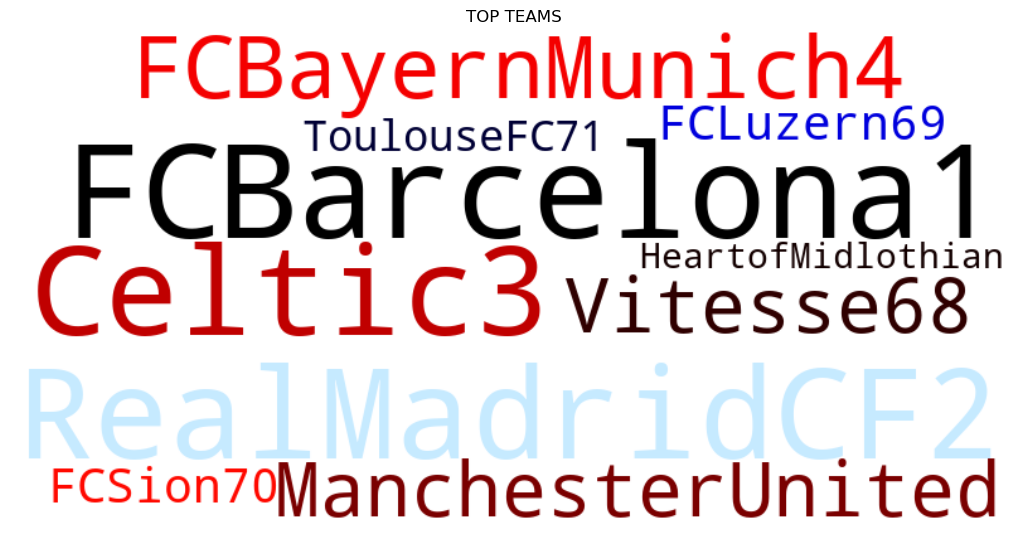

In [176]:
plt.figure(figsize=(13,8))
plt.imshow(wc,interpolation="bilinear")
plt.axis("off")
plt.title("TOP TEAMS")
plt.show()